

1.   Used normalized data for better accuracy
2.  also used confusion matrix to visualize the pattern build by the model.




In [33]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()
train_data.shape
import matplotlib.pyplot as plt

In [34]:
class_names=["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)
class_names[train_labels[12]]

'Sandal'

normalizing by diving by 255 (utilizing numpy property)

In [35]:
train_data_n=train_data/255.0
test_data_n=test_data/255.0

In [36]:
tf.random.set_seed(42)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")])
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
n1=model_12.fit(train_data_n,train_labels,epochs=20,validation_data=(test_data_n,test_labels))


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4039 - accuracy: 0.5010 - val_loss: 1.0621 - val_accuracy: 0.6628
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9406 - accuracy: 0.6887 - val_loss: 0.9006 - val_accuracy: 0.7069
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8275 - accuracy: 0.7301 - val_loss: 0.8118 - val_accuracy: 0.7396
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7497 - accuracy: 0.7531 - val_loss: 0.7523 - val_accuracy: 0.7588
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7119 - accuracy: 0.7599 - val_loss: 0.7225 - val_accuracy: 0.7563
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6843 - accuracy: 0.7636 - val_loss: 0.7089 - val_accuracy: 0.7577
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6660 - accuracy: 0.7660 - val_loss: 0.7000 - val_accuracy:

In [37]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):


  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)



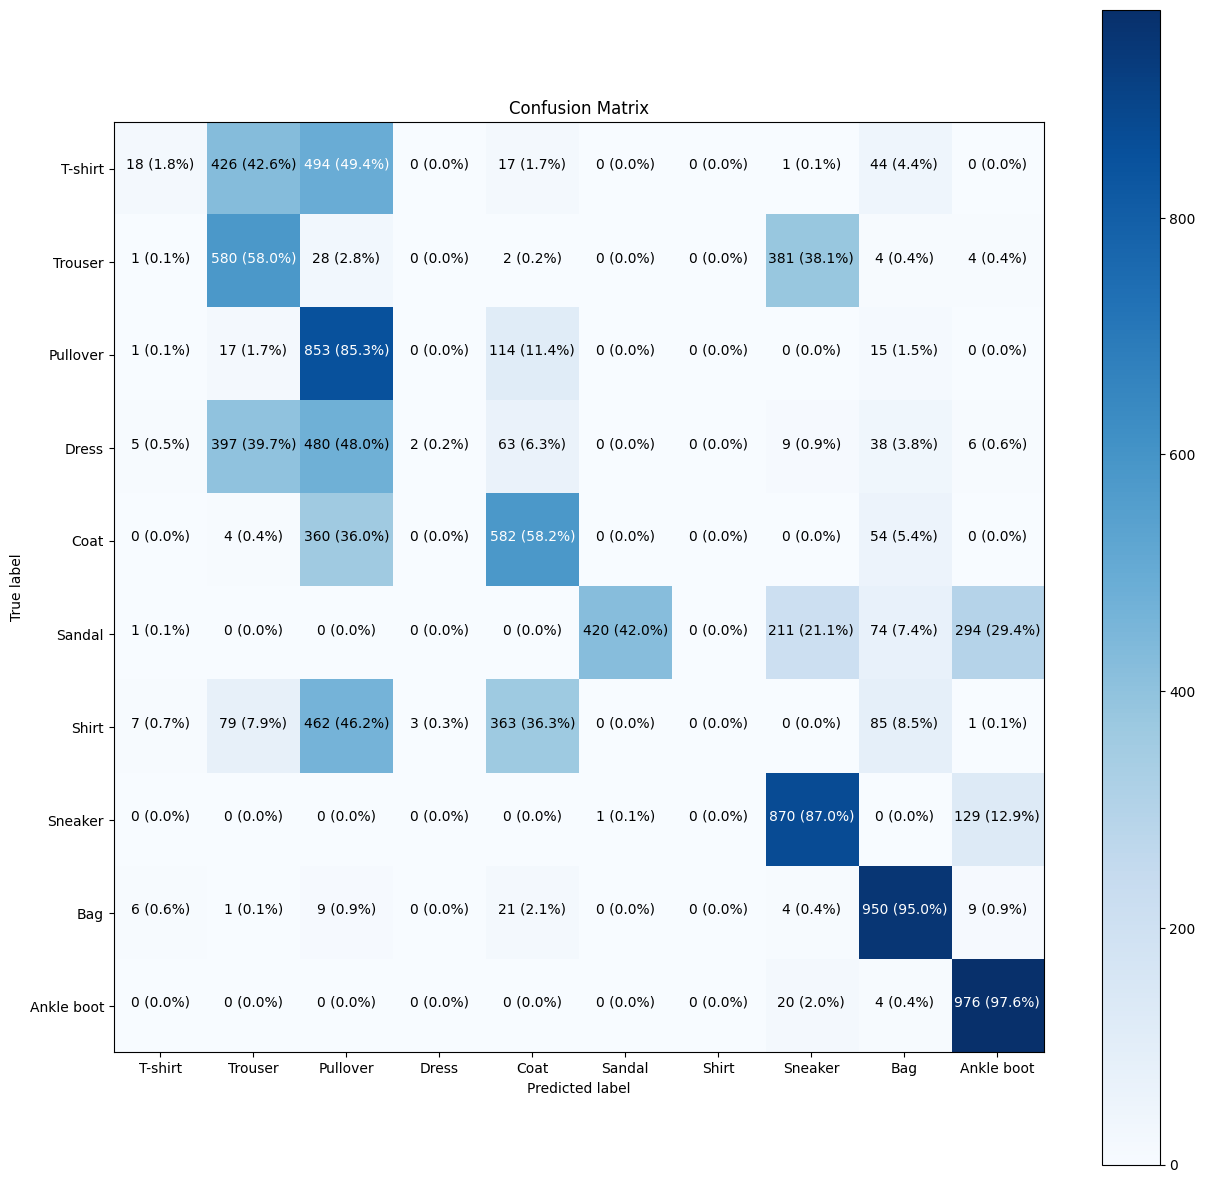

In [38]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

model comparable to others confuses more between
**shirt && pullover** , **trouser && sneaker**

In [39]:
import random
def plot(model,images,true_labels,classes):
  i=random.randint(0,len(images))
  target_images=images[i]
  pred_probs=model.predict(target_images.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  plt.imshow(target_images,cmap=plt.cm.binary)
  if pred_label==true_label:
    color ="green"
  else:
    color="red"
  plt.xlabel("pred:{} {:2.0f}% true:{}".format(pred_label,100*tf.reduce_max(pred_probs),true_label),color=color)


1/1 [==============================] - 0s 70ms/step


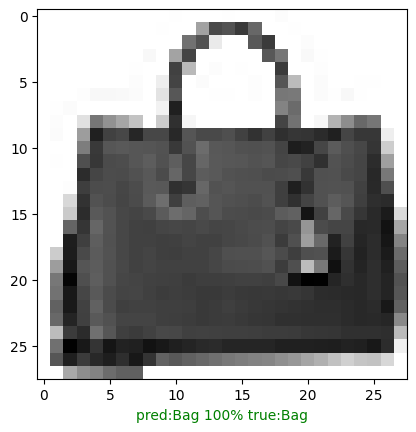

In [40]:
plot(model=model_12,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)